# Content

## 1. Compare customer behavior in different geographic areas
## 2. Determine spending habits between the different US regions
## 3. Determine the activity level of customers
## 4. Age profiling of customer database
## 5. Income profiling of customer database
## 6. Family status profiling of customer database
## 7. Product profiling of customer database: Baby Status
## 8. Product profiling of customer database: Pet Status
## 9. Other Analysis

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# String for Main Project Folder
path = r'C:\Users\ifari\12-2022 Instacart Basket Analysis'

In [3]:
# String to import Data Folder containing orders_products_all.pkl
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Dropping "_merge" column
df_all = df_all.drop(columns = ['_merge'])
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,new_customer,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,True,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,False,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'median_days_since_prior_order',
       'frequency_flag', 'new_customer', 'first_name', 'last_name', 'gender',
       'state', 'age', 'date_joined', 'num_dependants', 'fam_status',
       'income'],
      dtype='object')

> The customer data has PII data, including names, address and salary. This data will remain in the dataframe as it is not specified to remove in the brief. However, it will be noted in the final report.

In [6]:
# String to import Data Folder containing departments_wrangled.pkl
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [7]:
# Renaming Undamed:0 column to department_id
df_dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# Turning 'department' dataframe into data dictionary
zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [9]:
# Connect 'department' names to 'department_id' dataframe
df_all['department'] = df_all['department_id'].map(data_dict)

In [10]:
#First 10 rows of dataframe
df_all.head(10)

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages


### 1. Compare customer behavior in different geographic areas

In [11]:
# Define Regions
region1 = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
region2 = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region3 = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
region4 = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [12]:
# Creating new 'region' column
df_all.loc[df_all['state'].isin(region1), 'Region'] = 'Northeast'
df_all.loc[df_all['state'].isin(region2), 'Region'] = 'Midwest'
df_all.loc[df_all['state'].isin(region3), 'Region'] = 'South'
df_all.loc[df_all['state'].isin(region4), 'Region'] = 'West'

In [13]:
# Checking 'region' column
df_all['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [14]:
# Checking dimensions of the dataframe
df_all.shape

(32404859, 35)

In [15]:
# First 5 rows of the dataframe
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,department,Region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South


### 2. Determine spending habits between the different US regions

In [16]:
# Compare regions with 'spender_flag'
pd.crosstab(df_all['Region'], df_all['spender_flag'], dropna = False)

spender_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### 3. Determine activity level of customers

In [17]:
# Create an 'activity_flag'
df_all.loc[df_all['max_order'] < 5, 'activity_flag'] = 'Low Activity'
df_all.loc[df_all['max_order'] >= 5, 'activity_flag'] = 'High Activity'

In [18]:
# Checking 'activity_flag' column
df_all['activity_flag'].value_counts(dropna = False)

High Activity    30964564
Low Activity      1440295
Name: activity_flag, dtype: int64

In [19]:
# Compare regions with 'activity_flag'
pd.crosstab(df_all['Region'], df_all['activity_flag'], dropna = False)

activity_flag,High Activity,Low Activity
Region,,
Midwest,7261513,335812
Northeast,5464685,258051
South,10311139,480746
West,7927227,365686


In [20]:
# Create a subset of data for high activity customers
df_all_high = df_all[df_all['activity_flag'] == 'High Activity']

> Subset only contains data for high activity customers (excluding low activity customers).

In [21]:
# Checking dimensions the dataframe
df_all_high.shape

(30964564, 36)

In [22]:
# Exported high activity customers dataframe
df_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity.pkl'))

### 4. Age profiling of customer database

In [23]:
# Descriptive statistics of 'age'
df_all['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [24]:
# Create an 'age_group'
df_all.loc[df_all['age'] <= 35, 'age_group'] = 'Young Adult'
df_all.loc[(df_all['age'] > 35) & (df_all['age'] < 60), 'age_group'] = 'Middle-Aged Adult'
df_all.loc[df_all['age'] >= 60, 'age_group'] = 'Old Adult'

In [25]:
# Checking 'age_group' column
df_all['age_group'].value_counts(dropna = False)

Middle-Aged Adult    12191185
Old Adult            11067255
Young Adult           9146419
Name: age_group, dtype: int64

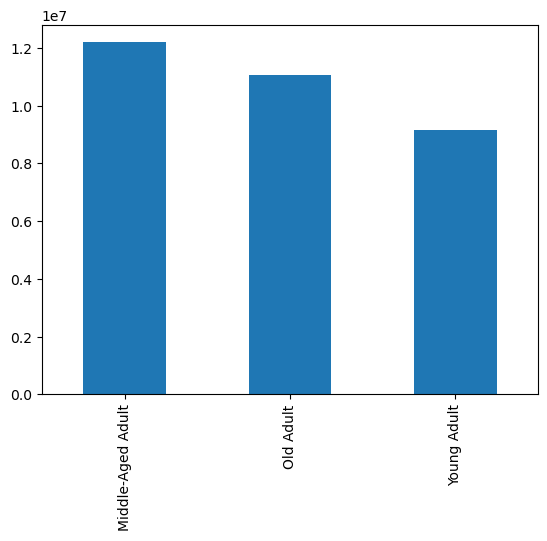

In [26]:
# Create a bar chart for 'age_group'
bar1 = df_all['age_group'].value_counts().plot.bar()

> Most of the customers are middle-aged adults with old adults and then young adults following right after.

In [27]:
# Export chart
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [28]:
# Aggregate for 'age_group' useage frequency
df_all.groupby('age_group').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle-Aged Adult              11.098956  0.0  30.0
Old Adult                      11.092552  0.0  30.0
Young Adult                    11.124858  0.0  30.0

In [29]:
# Aggregate for 'age_group' expenditure 
df_all.groupby('age_group').agg({'prices':['mean', 'min','max']})

prices              
                        mean  min      max
age_group                                 
Middle-Aged Adult  12.068365  1.0  99999.0
Old Adult          11.763336  1.0  99999.0
Young Adult        12.125184  1.0  99999.0

In [30]:
# Compare 'region' with 'age_group'
region_age = pd.crosstab(df_all['Region'], df_all['age_group'], dropna = False)
region_age

age_group,Middle-Aged Adult,Old Adult,Young Adult
Region,,,
Midwest,2913052,2569538,2114735
Northeast,2126330,1973103,1623303
South,4019241,3685583,3087061
West,3132562,2839031,2321320


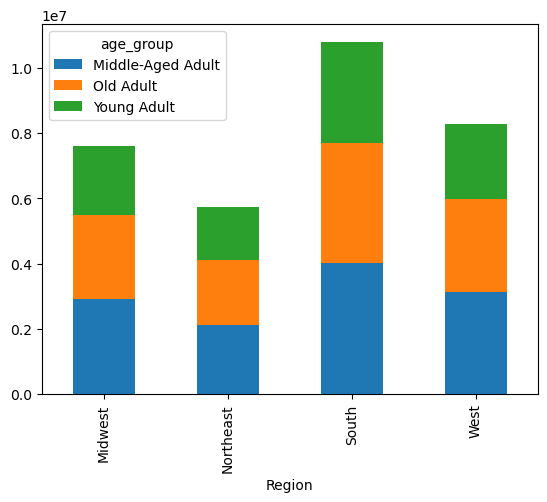

In [31]:
# Create a stacked bar chart for 'region_age'
bar2 = region_age.plot(kind = 'bar', stacked = True)

> Each region seem to have a proportional age groupings. However, the South region has the highest number of customers in each age group.

In [32]:
# Export chart
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_vs_age.png'))

In [33]:
# Compare 'loyalty_flag' with 'age_group'
loyalty_age = pd.crosstab(df_all['loyalty_flag'], df_all['age_group'], dropna = False)
loyalty_age

age_group,Middle-Aged Adult,Old Adult,Young Adult
loyalty_flag,,,
Loyal customer,3895771,3514773,2873549
New customer,2336651,2142726,1764613
Regular customer,5958763,5409756,4508257


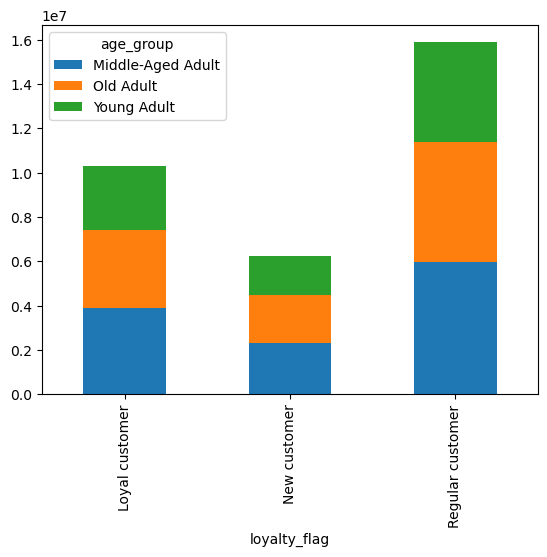

In [34]:
# Create a stacked bar chart for 'loyalty_age'
bar3 = loyalty_age.plot(kind = 'bar', stacked = True)

In [35]:
# Export chart
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_vs_age.png'))

In [36]:
# Compare 'department' with 'age_group'
department_age = pd.crosstab(df_all['department'], df_all['age_group'], dropna = False)
department_age

age_group,Middle-Aged Adult,Old Adult,Young Adult
department,,,
alcohol,58105,50664,44927
babies,163485,142912,117405
bakery,440526,400020,331882
beverages,1014176,923708,750239
breakfast,263525,238897,200611
bulk,12843,11803,9927
canned goods,401142,363738,303178
dairy eggs,2026653,1838082,1534012
deli,394560,359502,297187


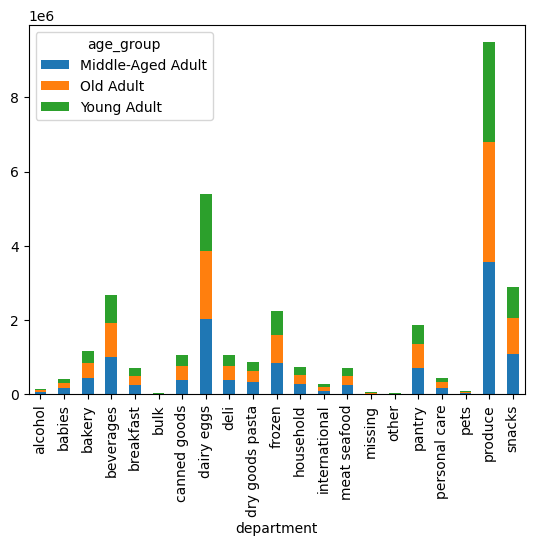

In [37]:
# Create a stacked bar chart for 'departments_age'
bar4 = department_age.plot(kind = 'bar', stacked = True)

> The Produce department has registered the highest sale across all age groups followed by Dairy/Eggs, Snacks and Beverages departments respectively. Most customers who purchase from the Dairy/Eggs and Produce departments are middle-aged adults follwed by old adults and then young adults. In addition, most customers who purchase from the Beverages department are middle-aged adults  followed by young adults and then old adults.

In [38]:
# Export chart
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_vs_age.png'))

### 5. Income profiling of customer database

In [39]:
# Descriptive statistics of 'income'
df_all['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [72]:
# Create an 'income_group'
df_all.loc[df_all['income'] <= 90000, 'income_group'] = 'Lower Class'
df_all.loc[(df_all['income'] > 90000) & (df_all['income'] < 200000), 'income_group'] = 'Middle Class'
df_all.loc[df_all['income'] >= 200000 , 'income_group'] = 'Upper Class'

In [73]:
# Checking 'income_group' column
df_all['income_group'].value_counts(dropna = False)

Middle Class    18334789
Lower Class     13811627
Upper Class       258443
Name: income_group, dtype: int64

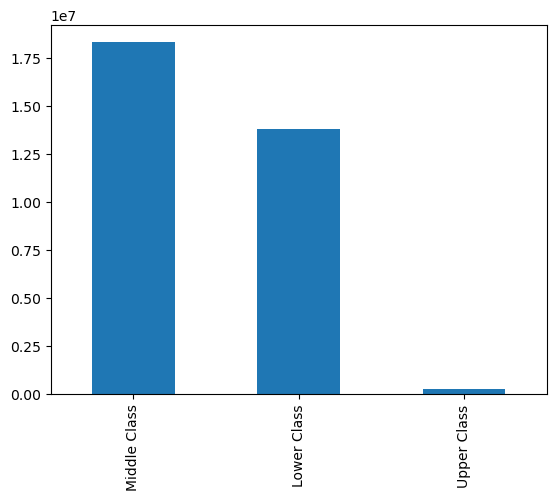

In [74]:
# Create a bar chart for 'income_group'
bar5 = df_all['income_group'].value_counts().plot.bar()

> Majority of customers are in the in middle class followed by the lower class and then the upper class.

In [75]:
# Export chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

In [76]:
# Aggregate for 'income_group' useage frequency
df_all.groupby('income_group').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                               mean  min   max
income_group                                  
Lower Class               11.191077  0.0  30.0
Middle Class              11.051707  0.0  30.0
Upper Class               10.199644  0.0  30.0

In [77]:
# Aggregate for 'income_group' expenditure 
df_all.groupby('income_group').agg({'prices':['mean', 'min','max']})

prices              
                    mean  min      max
income_group                          
Lower Class     7.642973  1.0  99999.0
Middle Class   11.685070  1.0  99999.0
Upper Class   264.709601  1.0  99999.0

In [78]:
# Compare 'region' with 'income_group'
region_income = pd.crosstab(df_all['Region'], df_all['income_group'], dropna = False)
region_income

income_group,Lower Class,Middle Class,Upper Class
Region,,,
Midwest,3207611,4324417,65297
Northeast,2413656,3267953,41127
South,4652034,6055005,84846
West,3538326,4687414,67173


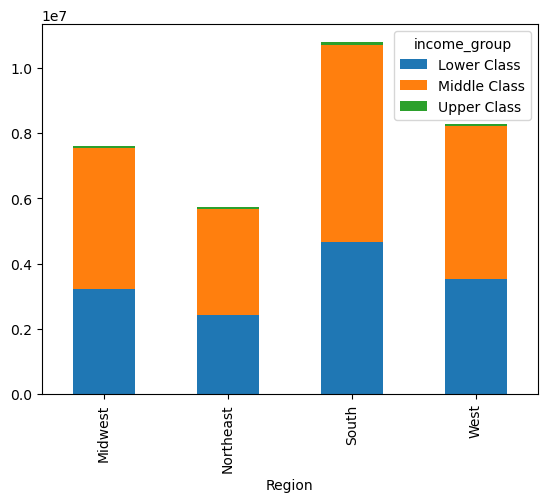

In [79]:
# Create a stacked bar chart for 'region_income'
bar6 = region_income.plot(kind = 'bar', stacked = True)

> Most of the customers come from Southern states followed by the West, Midwest and then Northeast. In addtion, the lower and middle class are majority of the customer base in all four regions.

In [80]:
# Export chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_vs_income.png'))

In [81]:
# Compare 'loyalty_flag' with 'income_group'
loyalty_income = pd.crosstab(df_all['loyalty_flag'], df_all['income_group'], dropna = False)
loyalty_income

income_group,Lower Class,Middle Class,Upper Class
loyalty_flag,,,
Loyal customer,4333644,5850982,99467
New customer,2804318,3413853,25819
Regular customer,6673665,9069954,133157


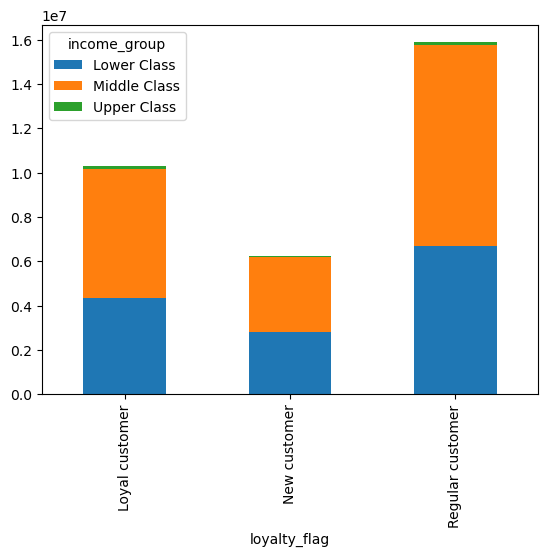

In [82]:
# Create a stacked bar chart for 'loyalty_income'
bar7 = loyalty_income.plot(kind = 'bar', stacked = True)

In [83]:
# Export chart
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_vs_income.png'))

### 6. Family status profiling of customer database

In [84]:
# Descriptive statistics of 'num_dependants'
df_all['num_dependants'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_dependants, dtype: float64

In [85]:
# Create an 'family_status_group'
df_all.loc[df_all['num_dependants'] == 0, 'family_status_group'] = 'Single Family Household'
df_all.loc[(df_all['num_dependants'] > 0) & (df_all['num_dependants'] <= 2), 'family_status_group'] = 'Small Family Household'
df_all.loc[df_all['num_dependants'] > 2, 'family_status_group'] = 'Large Family Household'

In [86]:
# Checking 'family_status_group' column
df_all['family_status_group'].value_counts(dropna = False)

Small Family Household     16172247
Large Family Household      8135109
Single Family Household     8097503
Name: family_status_group, dtype: int64

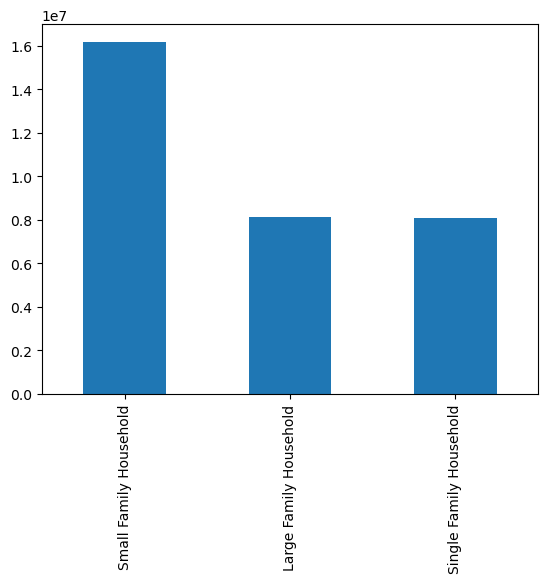

In [87]:
# Create a bar chart for 'family_status_group'
bar8 = df_all['family_status_group'].value_counts().plot.bar()

> Most of the customers are small family household with 1 or 2 dependants.

In [88]:
# Export chart
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_group.png'))

In [89]:
# Aggregate for 'family_status_group' useage frequency
df_all.groupby('family_status_group').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                          mean  min   max
family_status_group                                      
Large Family Household               11.109714  0.0  30.0
Single Family Household              11.080805  0.0  30.0
Small Family Household               11.112901  0.0  30.0

In [90]:
# Aggregate for 'family_status_group' expenditure 
df_all.groupby('family_status_group').agg({'prices':['mean', 'min','max']})

prices              
                              mean  min      max
family_status_group                             
Large Family Household   11.793264  1.0  99999.0
Single Family Household  12.129243  1.0  99999.0
Small Family Household   11.999659  1.0  99999.0

In [91]:
# Compare 'region' with 'family_status_group'
region_family_status = pd.crosstab(df_all['Region'], df_all['family_status_group'], dropna = False)
region_family_status

family_status_group,Large Family Household,Single Family Household,Small Family Household
Region,,,
Midwest,1874667,1905200,3817458
Northeast,1445080,1418301,2859355
South,2706538,2701659,5383688
West,2108824,2072343,4111746


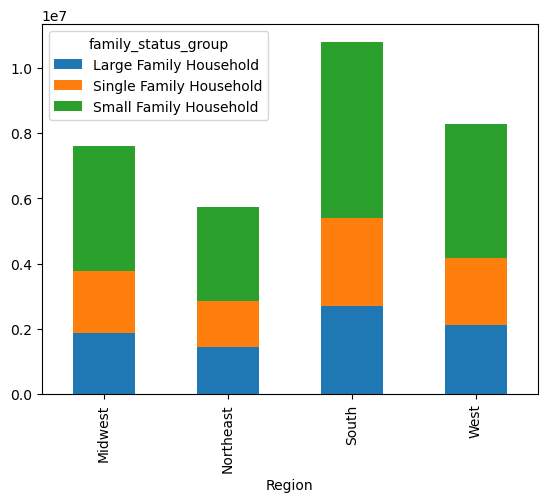

In [92]:
# Create a stacked bar chart for 'region_family_status'
bar9 = region_family_status.plot(kind = 'bar', stacked = True)

> Most customers in all four regions are small family households followed by single family households and then large family households.

In [93]:
# Export chart
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_vs_family_status.png'))

In [94]:
# Compare 'loyalty_flag' with 'family_status_group'
loyalty_family_status = pd.crosstab(df_all['loyalty_flag'], df_all['family_status_group'], dropna = False)
loyalty_family_status 

family_status_group,Large Family Household,Single Family Household,Small Family Household
loyalty_flag,,,
Loyal customer,2582679,2588844,5112570
New customer,1559095,1559087,3125808
Regular customer,3993335,3949572,7933869


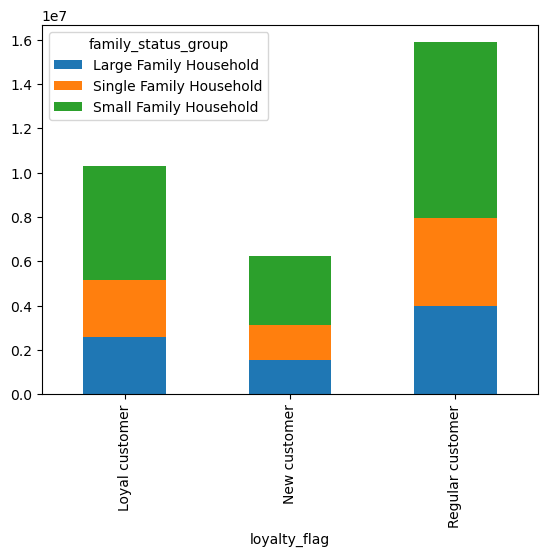

In [95]:
# Create a stacked bar chart for 'loyalty_family_status'
bar10 = loyalty_family_status.plot(kind = 'bar', stacked = True)

> Most of the customers are regular customers. From the regular customers, majority of the households are small family, having 1-2 dependants, followed by single family households. Loyal customers are comprised mostly of small family households as well.

In [96]:
# Export chart
bar10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_vs_family_status.png'))

In [97]:
# Compare 'department' with 'family_status_group'
department_family_status = pd.crosstab(df_all['department'], df_all['family_status_group'], dropna = False)
department_family_status

family_status_group,Large Family Household,Single Family Household,Small Family Household
department,,,
alcohol,39736,39118,74842
babies,106094,106494,211214
bakery,292859,294405,585164
beverages,670063,674442,1343618
breakfast,175466,174577,352990
bulk,8685,8278,17610
canned goods,269614,264838,533606
dairy eggs,1351908,1349362,2697477
deli,264530,265145,521574


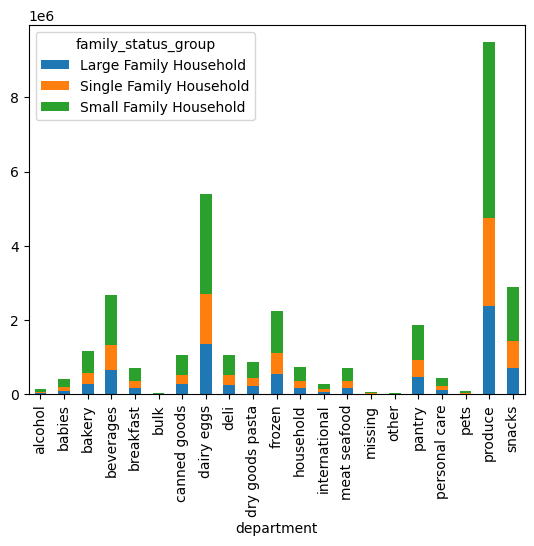

In [98]:
# Create a stacked bar chart for 'department_family_status'
bar11 = department_family_status.plot(kind = 'bar', stacked = True)

> In the Produce, Dairy/Eggs and Snacks departments, customer family status majority is small family, then large family followed by single family. The Bulk, Pets and Alchohol have the lowest customer numbers.

In [99]:
# Export chart
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_vs_family_status.png'))

In [100]:
# Compare 'orders_day_of_week' with 'family_status_group'
orders_dow_family_status = pd.crosstab(df_all['orders_day_of_week'], df_all['family_status_group'], dropna = False)
orders_dow_family_status

family_status_group,Large Family Household,Single Family Household,Small Family Household
orders_day_of_week,,,
0,1564100,1550309,3089773
1,1426184,1424767,2809279
2,1066795,1049129,2097906
3,962026,959353,1919155
4,943931,945205,1894666
5,1044235,1057145,2104411
6,1127838,1111595,2257057


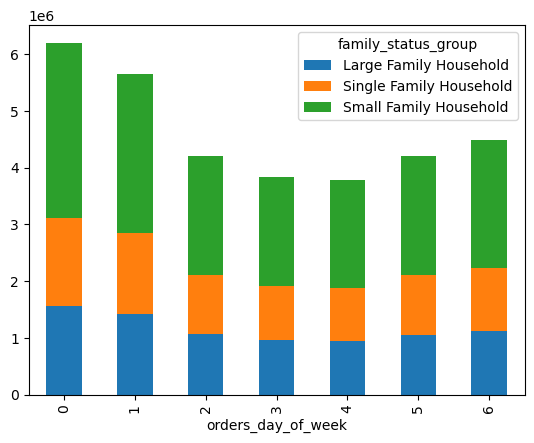

In [101]:
# Create a stacked bar chart for 'orders_dow_family_status'
bar12 = orders_dow_family_status.plot(kind = 'bar', stacked = True)

> All househoulds order the post on Saturdays followed by Sundays.

In [102]:
# Export chart
bar12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week_vs_family_status.png'))

In [103]:
# Compare 'time_of_order' with 'family_status_group'
too_family_status = pd.crosstab(df_all['time_of_order'], df_all['family_status_group'], dropna = False)
too_family_status

family_status_group,Large Family Household,Single Family Household,Small Family Household
time_of_order,,,
0,54508,54172,110089
1,29478,28342,57880
2,16901,17569,34905
3,13161,13015,25105
4,13451,12739,27052
5,22408,22052,43501
6,72630,73491,144372
7,222116,226971,441967
8,433114,431499,853505


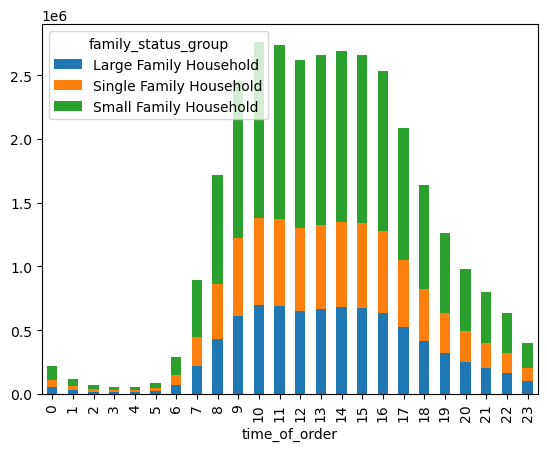

In [104]:
# Create a stacked bar chart for 'too_family_status'
bar13 = too_family_status.plot(kind = 'bar', stacked = True)

> The most orders come between 10 to 16 o'clock regardless of family status. Starting at 7am onwards the orders start to increase and remain high until 15 o'clock (3pm) when they are start to decline. The lowest amount of orders takes place during the early morning of 0 to 6 o'clock.

In [105]:
# Export chart
bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_time_of_order_vs_family_status.png'))

### 7. Product profiling of customer database: Baby Status

In [106]:
# Create 'baby_status' column
df_all['baby_status'] = [1 if x == 'babies' else 0 for x in df_all['department']]

In [107]:
# Grouping and aggregatng userid by 'baby_status'
df_all['baby_status'] = df_all.groupby(['user_id']) ['baby_status'].transform(np.max)

In [108]:
# Checking column 'baby_status'
df_all['baby_status'].value_counts(dropna = False)

0    22431550
1     9973309
Name: baby_status, dtype: int64

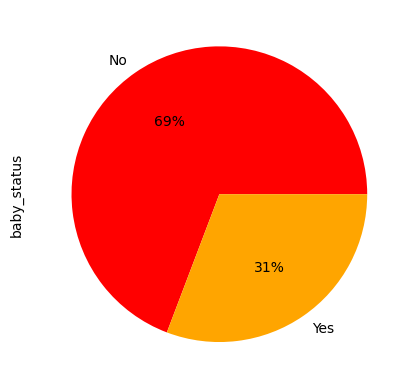

In [110]:
# Create a pie chart for the 'baby_status' column
pie1 = df_all['baby_status'].value_counts().plot.pie(labels = ['No', 'Yes'], autopct = ('%1.f%%'), colors = ['red','orange'])

> 31% of the products sold are baby products.

In [111]:
# Export chart
pie1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_baby_status.png'))

In [112]:
# Aggregate for 'baby_status' useage frequency
df_all.groupby('baby_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                              mean  min   max
baby_status                                  
0                        11.848432  0.0  30.0
1                         9.479345  0.0  30.0

In [113]:
# Aggregate for 'baby_status' expenditure 
df_all.groupby('baby_status').agg({'prices':['mean', 'min','max']})

prices              
                  mean  min      max
baby_status                         
0            12.515291  1.0  99999.0
1            10.776779  1.0  99999.0

### 7. Product profiling of customer database: Pet Status

In [114]:
# Create 'pet_status' column
df_all['pet_status'] = [1 if x == 'pets' else 0 for x in df_all['department']]

In [115]:
# Grouping and aggregatng 'user_id' by 'pet_status'
df_all['pet_status'] = df_all.groupby(['user_id']) ['pet_status'].transform(np.max)

In [116]:
# Checking column 'pet_status'
df_all['pet_status'].value_counts(dropna = False)

0    28876718
1     3528141
Name: pet_status, dtype: int64

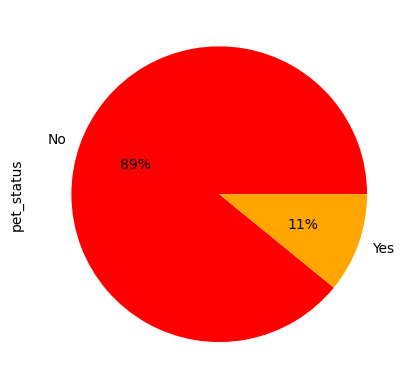

In [117]:
# Create a pie chart for the 'pet_status' column
pie2 = df_all['pet_status'].value_counts().plot.pie(labels = ['No', 'Yes'], autopct = ('%1.f%%'), colors = ['red','orange'])

> 11% of the products sold are pet products.

In [118]:
# Export chart
pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_pet_status.png'))

In [119]:
# Aggregate for 'pet_status' useage frequency
df_all.groupby('pet_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                             mean  min   max
pet_status                                  
0                       11.200417  0.0  30.0
1                       10.327303  0.0  30.0

In [120]:
# Aggregate for 'pet_status' expenditure 
df_all.groupby('pet_status').agg({'prices':['mean', 'min','max']})

prices              
                 mean  min      max
pet_status                         
0           11.680857  1.0  99999.0
1           14.430461  1.0  99999.0

### 8. Other Analysis

In [121]:
# Create table for 'department_id', 'department', 'price_range_loc' columns
pd.crosstab([df_all['department_id'], df_all['department']], df_all['price_range_loc'])

,price_range_loc,High-range product,Low-range product,Mid-range product
department_id,department,,,
1,frozen,0,681412,1553331
2,other,0,15972,20319
3,bakery,0,287938,884490
4,produce,0,2697883,6781408
5,alcohol,0,35243,118453
6,international,0,76974,192279
7,beverages,0,852974,1835149
8,pets,0,29551,68165
9,dry goods pasta,0,299327,567300


In [122]:
# Aggregate for 'department' purchase frequency
df_all.groupby('department').agg({'reordered':['mean','min', 'max']})

reordered        
                     mean min max
department                       
alcohol          0.569924   0   1
babies           0.578971   0   1
bakery           0.627889   0   1
beverages        0.653461   0   1
breakfast        0.560550   0   1
bulk             0.577040   0   1
canned goods     0.457405   0   1
dairy eggs       0.669690   0   1
deli             0.607719   0   1
dry goods pasta  0.461076   0   1
frozen           0.541764   0   1
household        0.402178   0   1
international    0.369229   0   1
meat seafood     0.567678   0   1
missing          0.395849   0   1
other            0.407980   0   1
pantry           0.346722   0   1
personal care    0.321296   0   1
pets             0.601324   0   1
produce          0.649913   0   1
snacks           0.574180   0   1

In [123]:
# Compare 'department' with 'loyalty_flag'
department_loyalty = pd.crosstab(df_all['department'], df_all['loyalty_flag'])
department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,37698,77275
babies,167108,60118,196576
bakery,379873,223704,568851
beverages,855017,512871,1320235
breakfast,221577,138362,343094
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1830707,971621,2596419
deli,324046,205750,521453


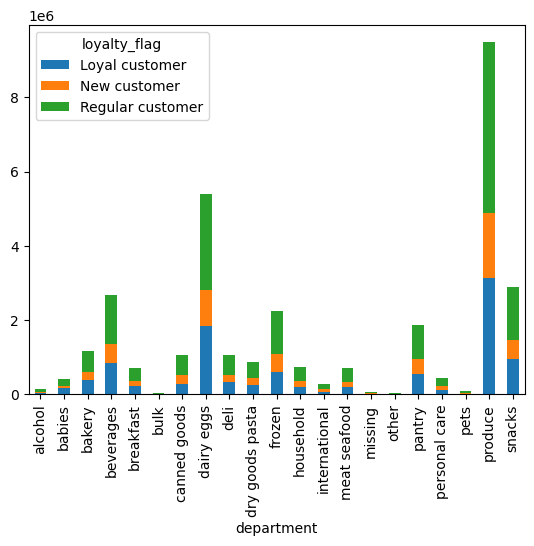

In [124]:
# Create a stacked bar chart for 'department_loyalty'
bar14 = department_loyalty.plot(kind = 'bar', stacked = True)

> For all departments, regular customers are the majority.

In [125]:
# Export chart
bar14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_vs_loyalty.png'))

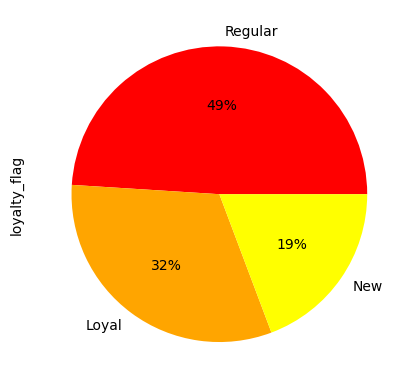

In [129]:
# Create a pie chart for the 'baby_status' column
pie3 = df_all['loyalty_flag'].value_counts().plot.pie(labels = ['Regular', 'Loyal', 'New'], autopct = ('%1.f%%'), colors = ['red','orange','yellow'])

In [130]:
# Export chart
pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_flag.png'))

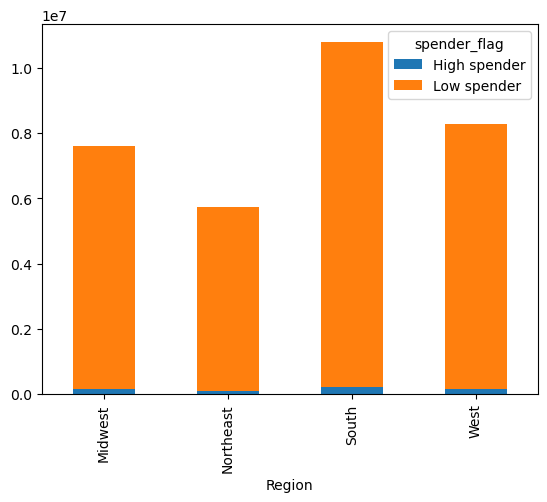

In [137]:
# Compare 'spender_flag' with 'region'
region_spender = pd.crosstab(df_all['Region'], df_all['spender_flag'])
bar15 = region_spender.plot(kind = 'bar', stacked = True)

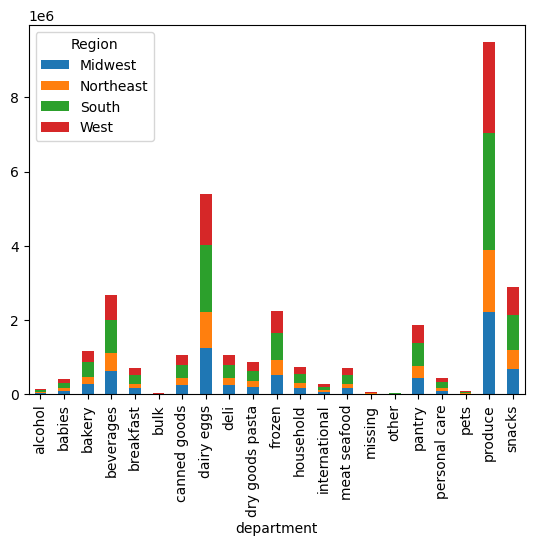

In [139]:
# Compare 'department' with 'region'
department_region = pd.crosstab(df_all['department'], df_all['Region'])
bar16 = department_region.plot(kind = 'bar', stacked = True)

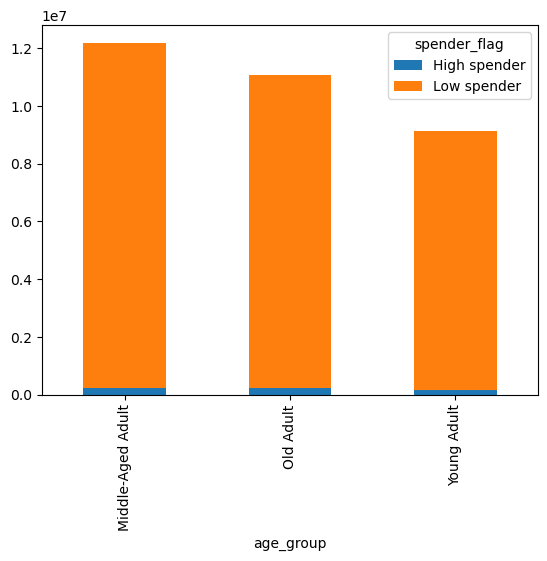

In [136]:
# Compare 'spender_flag' with 'age_group'
age_spender = pd.crosstab(df_all['age_group'], df_all['spender_flag'])
bar17 = age_spender.plot(kind = 'bar', stacked = True)

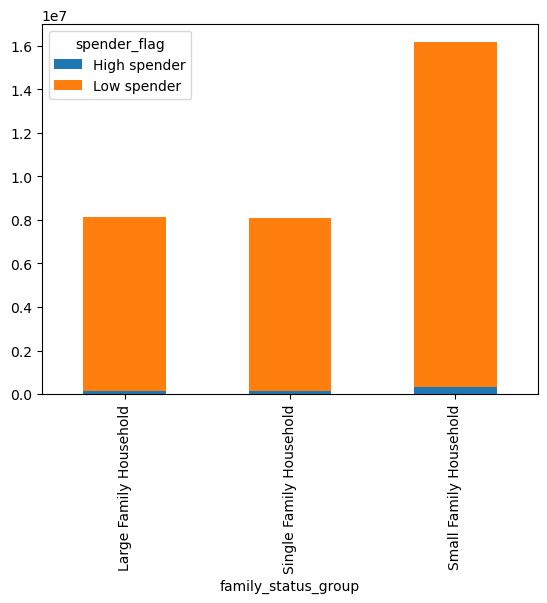

In [138]:
# Compare 'spender_flag' with 'family_status_group'
age_spender = pd.crosstab(df_all['family_status_group'], df_all['spender_flag'])
bar18 = age_spender.plot(kind = 'bar', stacked = True)

In [126]:
# Export data in pickle format
df_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_final.pkl'))